In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# 设置字体为 SimHei（黑体），以支持中文显示
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题

delivery_hz = pd.read_csv('D:/githubClone/LaDe/data/delivery/delivery_hz.csv')
pickup_hz = pd.read_csv('D:/githubClone/LaDe/data/pickup/pickup_hz.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)


将数据按配送顺序排序

In [ ]:
delivery_hz_sorted = delivery_hz.sort_values(by=['courier_id','delivery_time'], ascending=[True,True])
pickup_hz_sorted = pickup_hz.sort_values(by=['courier_id','pickup_time'], ascending=[True,True]).reset_index(drop=True)

print(delivery_hz_sorted.head(10))
print(pickup_hz_sorted.head(10))

        order_id  region_id      city  courier_id    lng   lat  aoi_id  \
856765   3019847         60  Hangzhou          11 120.29 30.21   24927   
841289   2473152         60  Hangzhou          11 120.30 30.21    7384   
842108   1910303         60  Hangzhou          11 120.30 30.21    9038   
843593   1635213         60  Hangzhou          11 120.29 30.21    9459   
840123   1121128         60  Hangzhou          11 120.29 30.21    7046   
840115   2857917         60  Hangzhou          11 120.29 30.21    7046   
840113   4038661         60  Hangzhou          11 120.29 30.21    7046   
840119   2811724         60  Hangzhou          11 120.29 30.21    7046   
840127   1407194         60  Hangzhou          11 120.29 30.21    7046   
840112   3716091         60  Hangzhou          11 120.29 30.21    7046   

        aoi_type     accept_time accept_gps_time  accept_gps_lng  \
856765        14  08-22 11:06:00  08-22 11:06:00          120.30   
841289        14  08-22 12:02:00  08-22 12:02:00 

In [4]:
pickup_hz_sorted.describe()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,pickup_gps_lng,pickup_gps_lat,accept_gps_lng,accept_gps_lat,ds
count,2130456.00,2130456.00,2130456.00,2130456.00,2130456.00,2130456.00,2130456.00,1383434.00,1383434.00,1043722.00,1043722.00,2130456.00
mean,3079837.22,58.32,7767.80,120.10,30.25,11794.03,5.38,120.11,30.26,120.11,30.26,773.89
std,1777982.49,31.42,4578.92,0.23,0.15,7177.45,5.94,0.22,0.15,0.22,0.15,171.95
min,0.00,1.00,1.00,119.01,28.10,4.00,0.00,102.54,20.00,102.54,20.01,501.00
25%,1540091.50,34.00,4132.00,120.03,30.19,5373.00,1.00,120.03,30.19,120.03,30.19,618.00
50%,3079221.00,68.00,7789.00,120.16,30.27,11882.00,1.00,120.17,30.26,120.17,30.26,803.00
75%,4619182.75,80.00,11568.00,120.26,30.35,17730.00,14.00,120.26,30.37,120.26,30.37,920.00
max,6161997.00,100.00,16064.00,120.96,30.50,24543.00,14.00,126.07,42.93,126.07,42.94,1031.00


## 数据类型
'order_id', 'region_id', 'city', 'courier_id', 'accept_time','time_window_start', 'time_window_end', 'lng', 'lat', 'aoi_id',
 订单id       地区id        城市      快递员id      接收时间     时间窗口开始时间    时间窗口结束时间     经度      纬度      区域id 
'aoi_type', 'pickup_time', 'pickup_gps_time', 'pickup_gps_lng', 'pickup_gps_lat', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat', 'ds'
 区域类型      取货时间        取货gps时间         取货gps经度       取货gps纬度         接单gps时间        接单gps经度        接单gps纬度     日期

In [5]:
pickup_hz_sorted.columns

Index(['order_id', 'region_id', 'city', 'courier_id', 'accept_time',
       'time_window_start', 'time_window_end', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'pickup_time', 'pickup_gps_time', 'pickup_gps_lng',
       'pickup_gps_lat', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat',
       'ds'],
      dtype='object')

In [6]:
# Step 1: 按 courier_id 分组并统计每个快递员的订单数量
courier_order_counts_series = pickup_hz_sorted.groupby('courier_id')['order_id'].count()
courier_order_counts = courier_order_counts_series.reset_index().rename(columns={'order_id': 'count'})
courier_order_counts_series

courier_id
1           3
7           3
13         12
14       7270
15         53
         ... 
16050       2
16051      70
16059       1
16060      82
16064       1
Name: order_id, Length: 5347, dtype: int64

## 统计信息
courier_order_counts.describe()
count    5347.00
mean      398.44
std      1289.63
min         1.00
25%         2.00
50%        13.00
75%        57.00
max     10526.00
Name: order_id, dtype: float64

快递员数量 courior number : 5346
订单数量   order id :  2130456

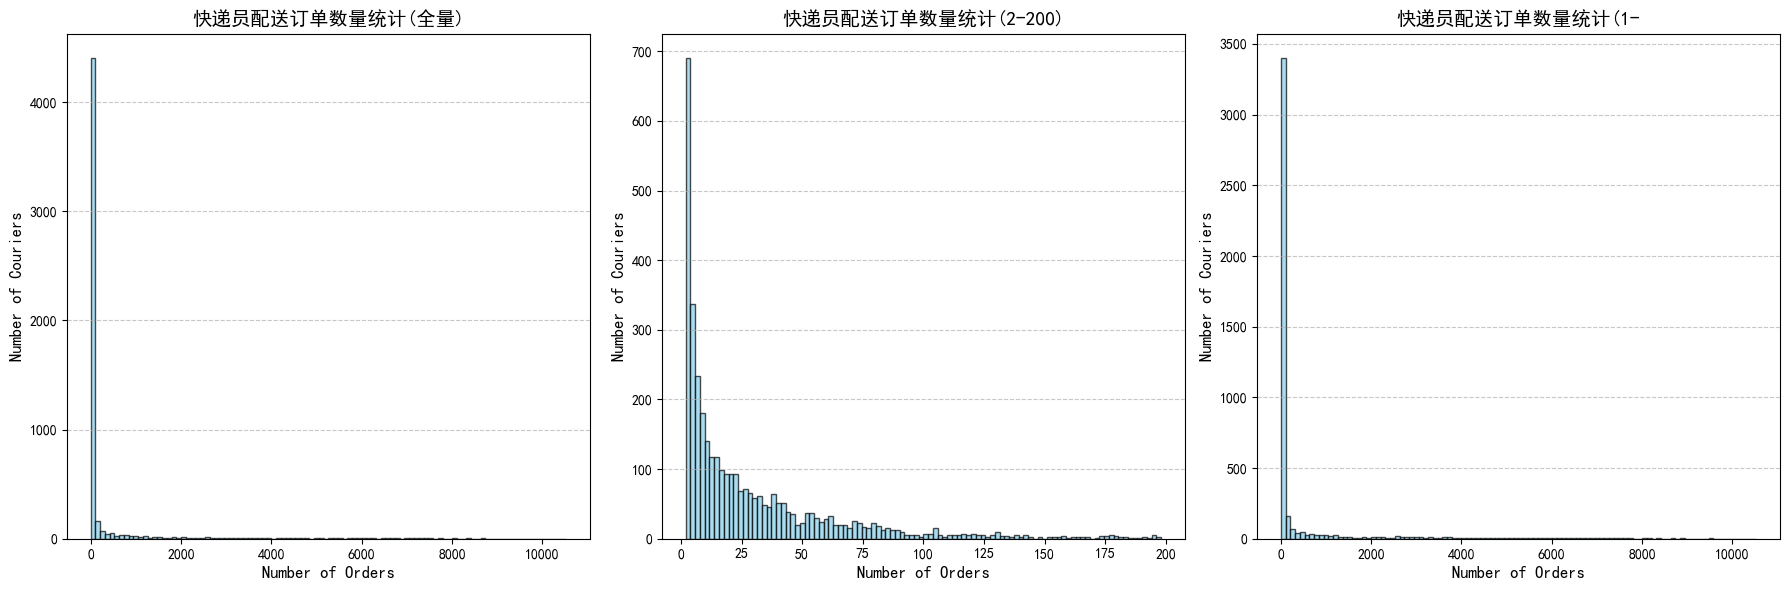

In [7]:
# 创建一行三列的子图
plt.figure(figsize=(18, 6))  # 宽度增加以适应三个子图

# 第一张图：全量数据
plt.subplot(1, 3, 1)  # 1行3列的第1个子图
plt.hist(courier_order_counts_series, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('快递员配送订单数量统计(全量)', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Couriers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 第二张图：2-200范围
plt.subplot(1, 3, 2)  # 1行3列的第2个子图
plt.hist(courier_order_counts_series[(courier_order_counts_series>1) & (courier_order_counts_series<200)], 
         bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('快递员配送订单数量统计(2-200)', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Couriers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 第三张图：1-100范围
plt.subplot(1, 3, 3)  # 1行3列的第3个子图
plt.hist(courier_order_counts_series[courier_order_counts_series >1], 
         bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('快递员配送订单数量统计(1-', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Couriers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

In [8]:
x = pickup_hz_sorted['aoi_id'].value_counts()
x

aoi_id
5373     27139
234      10998
3912      9288
9548      8354
3553      7940
         ...  
22770        1
1046         1
2488         1
14567        1
6712         1
Name: count, Length: 6811, dtype: int64

<Figure size 640x480 with 0 Axes>

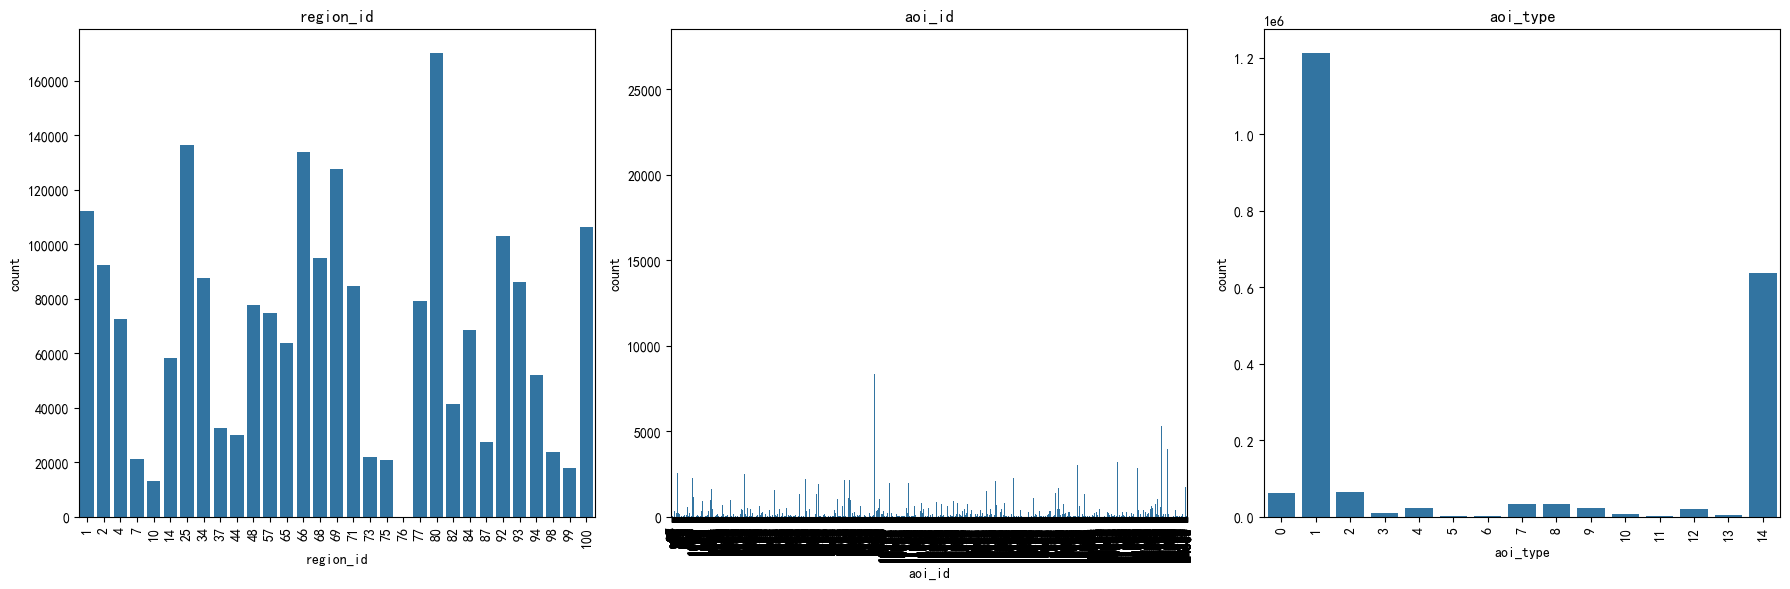

In [9]:
# 'region_id', 'city', 'courier_id', 'accept_time',
#        'time_window_start', 'time_window_end', 'lng', 'lat', 'aoi_id',
#        'aoi_type', 'pickup_time', 'pickup_gps_time', 'pickup_gps_lng',
#        'pickup_gps_lat', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat',
#        'ds'],
#  ['region_id', 'aoi_id', 'aoi_type']
import seaborn as sns

plt.figure()
plt.figure(figsize=(18, 6))
i = 1
for col in ['region_id', 'aoi_id', 'aoi_type']:
    plot_envs = plt.subplot(1, 3, i)
    i += 1
    v = pickup_hz_sorted[col].value_counts().reset_index()
    fig = sns.barplot(x=v[col], y=v['count'])
    for item in fig.get_xticklabels():
        item.set_rotation(90)
    plt.title(col)
plt.tight_layout()
plt.show()

## 现在构建快递员的特征

#### 设置训练集和测试集
1. 先去掉值为 1 的快递员

In [10]:
courier_order_counts_gt1 = courier_order_counts[courier_order_counts['count'] > 1]
courier_order_counts_gt1 # 先去掉值为 1 的快递员

,courier_id,count
0,1,3
1,7,3
2,13,12
3,14,7270
4,15,53
...,...,...
5340,16045,3
5341,16047,3
5342,16050,2
5343,16051,70


In [11]:
# 筛选配送订单数大于1的快递员
pickup_hz_gt1 = pickup_hz_sorted[pickup_hz_sorted['courier_id'].isin(courier_order_counts_gt1['courier_id'])]
pickup_hz_gt1


,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,aoi_type,pickup_time,pickup_gps_time,pickup_gps_lng,pickup_gps_lat,accept_gps_time,accept_gps_lng,accept_gps_lat,ds
0,2119045,14,Hangzhou,1,07-19 09:21:00,07-19 14:25:00,07-19 16:25:00,119.05,29.59,12608,14,07-19 13:40:00,NaN,NaN,NaN,NaN,NaN,NaN,719
1,82805,14,Hangzhou,1,10-02 09:11:00,10-02 09:09:00,10-02 11:09:00,119.04,29.59,1421,1,10-02 09:44:00,NaN,NaN,NaN,NaN,NaN,NaN,1002
2,3179303,14,Hangzhou,1,10-03 08:13:00,10-03 09:00:00,10-03 11:00:00,119.03,29.60,19548,1,10-03 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,1003
3,4596953,71,Hangzhou,7,07-30 08:23:00,07-30 09:00:00,07-30 11:00:00,120.33,30.20,20064,1,07-30 10:03:00,NaN,NaN,NaN,NaN,NaN,NaN,730
4,350131,71,Hangzhou,7,08-01 08:31:00,08-01 09:00:00,08-01 11:00:00,120.33,30.20,20064,1,08-01 09:26:00,NaN,NaN,NaN,NaN,NaN,NaN,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130450,1558081,1,Hangzhou,16060,10-26 08:20:00,10-26 09:00:00,10-26 11:00:00,120.05,30.36,9548,1,10-26 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,1026
2130451,4867105,1,Hangzhou,16060,10-26 10:58:00,10-26 11:00:00,10-26 13:00:00,120.05,30.36,9548,1,10-26 11:36:00,NaN,NaN,NaN,NaN,NaN,NaN,1026
2130452,1906764,1,Hangzhou,16060,10-26 16:36:00,10-26 17:00:00,10-26 19:00:00,120.05,30.36,9548,1,10-26 18:50:00,NaN,NaN,NaN,NaN,NaN,NaN,1026
2130453,640763,1,Hangzhou,16060,10-27 09:43:00,10-28 09:00:00,10-28 11:00:00,120.05,30.36,9548,1,10-28 08:21:00,NaN,NaN,NaN,NaN,NaN,NaN,1028


In [12]:
time_col = ['accept_time', 'time_window_start','time_window_end','pickup_time']

for col in time_col:
    pickup_hz_gt1[col] = pd.to_datetime(pickup_hz_gt1[col], format='%m-%d %H:%M:%S').apply(lambda x: x.replace(year=2023))
pickup_hz_gt1

C:\Users\ACER\AppData\Local\Temp\ipykernel_11280\1267958287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_hz_gt1[col] = pd.to_datetime(pickup_hz_gt1[col], format='%m-%d %H:%M:%S').apply(lambda x: x.replace(year=2023))
C:\Users\ACER\AppData\Local\Temp\ipykernel_11280\1267958287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_hz_gt1[col] = pd.to_datetime(pickup_hz_gt1[col], format='%m-%d %H:%M:%S').apply(lambda x: x.replace(year=2023))
C:\Users\ACER\AppData\Local\Temp\ipykernel_11280\1

,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,aoi_type,pickup_time,pickup_gps_time,pickup_gps_lng,pickup_gps_lat,accept_gps_time,accept_gps_lng,accept_gps_lat,ds
0,2119045,14,Hangzhou,1,2023-07-19 09:21:00,2023-07-19 14:25:00,2023-07-19 16:25:00,119.05,29.59,12608,14,2023-07-19 13:40:00,NaN,NaN,NaN,NaN,NaN,NaN,719
1,82805,14,Hangzhou,1,2023-10-02 09:11:00,2023-10-02 09:09:00,2023-10-02 11:09:00,119.04,29.59,1421,1,2023-10-02 09:44:00,NaN,NaN,NaN,NaN,NaN,NaN,1002
2,3179303,14,Hangzhou,1,2023-10-03 08:13:00,2023-10-03 09:00:00,2023-10-03 11:00:00,119.03,29.60,19548,1,2023-10-03 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,1003
3,4596953,71,Hangzhou,7,2023-07-30 08:23:00,2023-07-30 09:00:00,2023-07-30 11:00:00,120.33,30.20,20064,1,2023-07-30 10:03:00,NaN,NaN,NaN,NaN,NaN,NaN,730
4,350131,71,Hangzhou,7,2023-08-01 08:31:00,2023-08-01 09:00:00,2023-08-01 11:00:00,120.33,30.20,20064,1,2023-08-01 09:26:00,NaN,NaN,NaN,NaN,NaN,NaN,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130450,1558081,1,Hangzhou,16060,2023-10-26 08:20:00,2023-10-26 09:00:00,2023-10-26 11:00:00,120.05,30.36,9548,1,2023-10-26 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,1026
2130451,4867105,1,Hangzhou,16060,2023-10-26 10:58:00,2023-10-26 11:00:00,2023-10-26 13:00:00,120.05,30.36,9548,1,2023-10-26 11:36:00,NaN,NaN,NaN,NaN,NaN,NaN,1026
2130452,1906764,1,Hangzhou,16060,2023-10-26 16:36:00,2023-10-26 17:00:00,2023-10-26 19:00:00,120.05,30.36,9548,1,2023-10-26 18:50:00,NaN,NaN,NaN,NaN,NaN,NaN,1026
2130453,640763,1,Hangzhou,16060,2023-10-27 09:43:00,2023-10-28 09:00:00,2023-10-28 11:00:00,120.05,30.36,9548,1,2023-10-28 08:21:00,NaN,NaN,NaN,NaN,NaN,NaN,1028


In [13]:
def getlabel(df):
    df_ = df.copy()

    df_['traj_label'] = 0
    group_cols = ['courier_id', 'time_window_start', 'time_window_end', 'ds']

    df_['group_id'] = df_.groupby(group_cols).ngroup()

    first_rows = df_.groupby(group_cols).head(1).index
    df_.loc[first_rows, 'traj_label'] = 2
    
    last_rows = df_.groupby(group_cols).tail(1).index
    df_.loc[last_rows, 'traj_label'] = 1



    return df_
pickup_data = getlabel(pickup_hz_gt1)
pickup_data

,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,...,pickup_time,pickup_gps_time,pickup_gps_lng,pickup_gps_lat,accept_gps_time,accept_gps_lng,accept_gps_lat,ds,traj_label,group_id
0,2119045,14,Hangzhou,1,2023-07-19 09:21:00,2023-07-19 14:25:00,2023-07-19 16:25:00,119.05,29.59,12608,...,2023-07-19 13:40:00,NaN,NaN,NaN,NaN,NaN,NaN,719,1,0
1,82805,14,Hangzhou,1,2023-10-02 09:11:00,2023-10-02 09:09:00,2023-10-02 11:09:00,119.04,29.59,1421,...,2023-10-02 09:44:00,NaN,NaN,NaN,NaN,NaN,NaN,1002,1,1
2,3179303,14,Hangzhou,1,2023-10-03 08:13:00,2023-10-03 09:00:00,2023-10-03 11:00:00,119.03,29.60,19548,...,2023-10-03 08:16:00,NaN,NaN,NaN,NaN,NaN,NaN,1003,1,2
3,4596953,71,Hangzhou,7,2023-07-30 08:23:00,2023-07-30 09:00:00,2023-07-30 11:00:00,120.33,30.20,20064,...,2023-07-30 10:03:00,NaN,NaN,NaN,NaN,NaN,NaN,730,1,3
4,350131,71,Hangzhou,7,2023-08-01 08:31:00,2023-08-01 09:00:00,2023-08-01 11:00:00,120.33,30.20,20064,...,2023-08-01 09:26:00,NaN,NaN,NaN,NaN,NaN,NaN,801,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130450,1558081,1,Hangzhou,16060,2023-10-26 08:20:00,2023-10-26 09:00:00,2023-10-26 11:00:00,120.05,30.36,9548,...,2023-10-26 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,1026,1,591414
2130451,4867105,1,Hangzhou,16060,2023-10-26 10:58:00,2023-10-26 11:00:00,2023-10-26 13:00:00,120.05,30.36,9548,...,2023-10-26 11:36:00,NaN,NaN,NaN,NaN,NaN,NaN,1026,1,591415
2130452,1906764,1,Hangzhou,16060,2023-10-26 16:36:00,2023-10-26 17:00:00,2023-10-26 19:00:00,120.05,30.36,9548,...,2023-10-26 18:50:00,NaN,NaN,NaN,NaN,NaN,NaN,1026,1,591416
2130453,640763,1,Hangzhou,16060,2023-10-27 09:43:00,2023-10-28 09:00:00,2023-10-28 11:00:00,120.05,30.36,9548,...,2023-10-28 08:21:00,NaN,NaN,NaN,NaN,NaN,NaN,1028,2,591417


构造用户特征、商品特征、交互特征
我现在的目标是，对于新产生的订单（label==1），我预测其会被分配给哪个快递员、快递员的预期pickup的时间是多少
（多目标排序模型），DSIN

每一个快递员对于每一件商品，都会有一个accept_rate
快递员侧：会生成一个accept_rate降序排列的订单列表
订单侧：会生成一个accept_rate降序排列的快递员列表

In [14]:
pickup_data['traj_label'].value_counts()
# traj_label
# 0    1284425   # 路径中订单
# 1     591418   # 路径中最后一个订单
# 2     253608   # 路径中第一个订单
# Name: count, dtype: int64


# 所以，只有一个订单的group共有591418-253608=338200个，

traj_label
0    1284425
1     591418
2     253608
Name: count, dtype: int64

In [15]:
import numpy as np
groups = pickup_data['group_id'].unique()
trn_data,val_data,tst_data = [],[],[]
# 设置随机种子以确保结果可复现
np.random.seed(2025)

# 随机打乱分组
shuffled_groups = np.random.permutation(groups)

# 计算划分比例
train_size = int(len(shuffled_groups) * 0.7)
val_size = int(len(shuffled_groups) * 0.15)

# 划分分组
train_groups = shuffled_groups[:train_size]
val_groups = shuffled_groups[train_size : train_size + val_size]
test_groups = shuffled_groups[train_size + val_size:]

# 打印划分结果
print("Train Groups:", train_groups.shape)
print("Validation Groups:", val_groups.shape)
print("Test Groups:", test_groups.shape)


Train Groups: (413992,)
Validation Groups: (88712,)
Test Groups: (88714,)


In [16]:
train_data = pickup_data[pickup_data['group_id'].isin(train_groups)]
val_data = pickup_data[pickup_data['group_id'].isin(val_groups)]
test_data = pickup_data[pickup_data['group_id'].isin(test_groups)]
print("Training data size:", len(train_data))
print("Validation data size:", len(val_data))
print("Test data size:", len(test_data))

Training data size: 1492052
Validation data size: 318897
Test data size: 318502


In [17]:
train_data


,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,...,pickup_time,pickup_gps_time,pickup_gps_lng,pickup_gps_lat,accept_gps_time,accept_gps_lng,accept_gps_lat,ds,traj_label,group_id
0,2119045,14,Hangzhou,1,2023-07-19 09:21:00,2023-07-19 14:25:00,2023-07-19 16:25:00,119.05,29.59,12608,...,2023-07-19 13:40:00,NaN,NaN,NaN,NaN,NaN,NaN,719,1,0
1,82805,14,Hangzhou,1,2023-10-02 09:11:00,2023-10-02 09:09:00,2023-10-02 11:09:00,119.04,29.59,1421,...,2023-10-02 09:44:00,NaN,NaN,NaN,NaN,NaN,NaN,1002,1,1
3,4596953,71,Hangzhou,7,2023-07-30 08:23:00,2023-07-30 09:00:00,2023-07-30 11:00:00,120.33,30.20,20064,...,2023-07-30 10:03:00,NaN,NaN,NaN,NaN,NaN,NaN,730,1,3
4,350131,71,Hangzhou,7,2023-08-01 08:31:00,2023-08-01 09:00:00,2023-08-01 11:00:00,120.33,30.20,20064,...,2023-08-01 09:26:00,NaN,NaN,NaN,NaN,NaN,NaN,801,1,4
5,4649500,71,Hangzhou,7,2023-08-09 08:13:00,2023-08-09 09:00:00,2023-08-09 11:00:00,120.33,30.20,20064,...,2023-08-09 09:46:00,NaN,NaN,NaN,NaN,NaN,NaN,809,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130447,1646980,1,Hangzhou,16060,2023-10-24 11:01:00,2023-10-24 11:01:00,2023-10-24 13:01:00,120.05,30.36,9548,...,2023-10-24 11:14:00,NaN,NaN,NaN,NaN,NaN,NaN,1024,1,591411
2130450,1558081,1,Hangzhou,16060,2023-10-26 08:20:00,2023-10-26 09:00:00,2023-10-26 11:00:00,120.05,30.36,9548,...,2023-10-26 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,1026,1,591414
2130452,1906764,1,Hangzhou,16060,2023-10-26 16:36:00,2023-10-26 17:00:00,2023-10-26 19:00:00,120.05,30.36,9548,...,2023-10-26 18:50:00,NaN,NaN,NaN,NaN,NaN,NaN,1026,1,591416
2130453,640763,1,Hangzhou,16060,2023-10-27 09:43:00,2023-10-28 09:00:00,2023-10-28 11:00:00,120.05,30.36,9548,...,2023-10-28 08:21:00,NaN,NaN,NaN,NaN,NaN,NaN,1028,2,591417


In [ ]:

# coding=utf-8
# author=uliontse

import numpy
import torch
from sklearn.metrics import roc_auc_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report

from mlgb import get_model, ranking_models
from mlgb.data import get_binary_label_data
from mlgb.utils import check_filepath


def train_and_evaluate(model, optimizer, loss_fn, x_train, y_train, x_test, y_test,
                       epochs=10, train_batch_size=32, test_batch_size=32, valid_ratio=0.15, device=None):

    if device is None:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'

    train_batch_num = int(len(y_train) // train_batch_size)  # drop_last=True
    test_batch_num = int(len(y_test) // test_batch_size)  # drop_last=True

    print(end='\n')
    for epoch in range(epochs):
        model.train()
        for i in range(train_batch_num):
            id_l, id_r = int(train_batch_size * i), int(train_batch_size * (i + 1 - valid_ratio))
            if model_name in two_inputs_models:
                x_train_batch = [[m[id_l: id_r] for m in x_t] for x_t in x_train]
            else:
                x_train_batch = [m[id_l: id_r] for m in x_train]
            y_train_batch = y_train[id_l: id_r]

            y_pred_batch = torch.squeeze(model(x_train_batch))
            y_train_batch = torch.as_tensor(y_train_batch, dtype=torch.float32, device=device)

            l1l2_loss = model.l1l2_loss()
            loss = loss_fn(y_pred_batch, y_train_batch) + l1l2_loss  #
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        model.eval()
        y_train_epoch = numpy.array([])
        y_valid_epoch = numpy.array([])
        y_test_epoch = numpy.array([])
        y_train_pred_prob_epoch = numpy.array([])
        y_valid_pred_prob_epoch = numpy.array([])
        y_test_pred_prob_epoch = numpy.array([])
        with torch.no_grad():
            for i in range(train_batch_num):
                id_l, id_r = int(train_batch_size * i), int(train_batch_size * (i + 1 - valid_ratio))
                if model_name in two_inputs_models:
                    x_train_batch = [[m[id_l: id_r] for m in x_t] for x_t in x_train]
                else:
                    x_train_batch = [m[id_l: id_r] for m in x_train]
                y_train_batch = y_train[id_l: id_r]

                y_train_output = torch.squeeze(model(x_train_batch)).cpu().numpy()
                y_train_pred_prob_epoch = numpy.concatenate([y_train_pred_prob_epoch, y_train_output], axis=0)
                y_train_epoch = numpy.concatenate([y_train_epoch, y_train_batch], axis=0)

            for i in range(train_batch_num):
                id_l, id_r = int(train_batch_size * (i + 1 - valid_ratio)), int(train_batch_size * (i + 1))
                if model_name in two_inputs_models:
                    x_valid_batch = [[m[id_l: id_r] for m in x_t] for x_t in x_train]
                else:
                    x_valid_batch = [m[id_l: id_r] for m in x_train]
                y_valid_batch = y_train[id_l: id_r]

                y_valid_output = torch.squeeze(model(x_valid_batch)).cpu().numpy()
                y_valid_pred_prob_epoch = numpy.concatenate([y_valid_pred_prob_epoch, y_valid_output], axis=0)
                y_valid_epoch = numpy.concatenate([y_valid_epoch, y_valid_batch], axis=0)

            for i in range(test_batch_num):
                id_l, id_r = int(train_batch_size * i), int(train_batch_size * (i + 1))
                if model_name in two_inputs_models:
                    x_test_batch = [[m[id_l: id_r] for m in x_t] for x_t in x_test]
                else:
                    x_test_batch = [m[id_l: id_r] for m in x_test]
                y_test_batch = y_test[id_l: id_r]

                y_test_output = torch.squeeze(model(x_test_batch)).cpu().numpy()
                y_test_pred_prob_epoch = numpy.concatenate([y_test_pred_prob_epoch, y_test_output], axis=0)
                y_test_epoch = numpy.concatenate([y_test_epoch, y_test_batch], axis=0)


        y_train_pred_epoch = numpy.where(y_train_pred_prob_epoch >= 0.5, 1, 0)
        y_valid_pred_epoch = numpy.where(y_valid_pred_prob_epoch >= 0.5, 1, 0)
        y_test_pred_epoch = numpy.where(y_test_pred_prob_epoch >= 0.5, 1, 0)
        result = {
            'epoch': epoch + 1,
            'bce': round(log_loss(y_train_epoch, y_train_pred_prob_epoch), 4),
            'auc': round(roc_auc_score(y_train_epoch, y_train_pred_prob_epoch), 4),
            'f1': round(f1_score(y_train_epoch, y_train_pred_epoch, average='macro'), 4),

            'val_bce': round(log_loss(y_valid_epoch, y_valid_pred_prob_epoch), 4),
            'val_auc': round(roc_auc_score(y_valid_epoch, y_valid_pred_prob_epoch), 4),
            'val_f1': round(f1_score(y_valid_epoch, y_valid_pred_epoch, average='macro'), 4),

            'test_bce': round(log_loss(y_test_epoch, y_test_pred_prob_epoch), 4),
            'test_auc': round(roc_auc_score(y_test_epoch, y_test_pred_prob_epoch), 4),
            'test_f1': round(f1_score(y_test_epoch, y_test_pred_epoch, average='macro'), 4),
        }
        print('evaluate:', result)
    return model


if __name__ == '__main__':
    # model_name = 'PNN'
    lang = 'torch'
    device = None
    seed = 0

    two_inputs_models = ['PLM', 'GRU4Rec', 'Caser', 'SASRec', 'BERT4Rec', 'BST', 'DIN', 'DIEN', 'DSIN']

    data = get_binary_label_data(
        n_samples=int(1e3),
        negative_class_weight=0.9,
        test_size=0.15,
        inputs_if_2_groups=False,
        seed=seed,
    )
    plm_data = get_binary_label_data(
        n_samples=int(1e3),
        negative_class_weight=0.9,
        test_size=0.15,
        inputs_if_2_groups=True,
        seed=seed,
    )

    for i, model_name in enumerate(ranking_models[41:]):
        print(i, model_name, end='\n\n')

        # path of save_model:
        tmp_dir = '.tmp'
        model_dir = f'{tmp_dir}/{model_name}_{lang}'
        log_dir = f'{model_dir}/log_dir'
        save_model_dir = f'{model_dir}/save_model'
        save_model_file = f'{save_model_dir}/model.pth'
        check_filepath(tmp_dir, model_dir, log_dir, save_model_dir,)

        # get_data:
        feature_names, (x_train, y_train), (x_test, y_test) = plm_data if model_name in two_inputs_models else data
        if model_name in two_inputs_models:
            print(f'features: {[[len(names) for names in group] for group in feature_names]}', end='\n\n')
        else:
            print(f'features: {[len(names) for names in feature_names]}', end='\n\n')

        # train and evaluate:
        model = get_model(
            feature_names=feature_names,
            model_name=model_name,
            task='binary',
            aim='ranking',
            lang='torch',
            device=device,
            seed=seed,
            model_l1=0.0,
            model_l2=1e-6,
        )
        print(model, end='\n\n')

        # must init parameters by build() like tf at first run:
        _ = model(x_test)  # shape requires: any batch_size, other shape must be same as x_train and x_test.
        for name, p in model.named_parameters():
            print(name, list(p.shape), sep='\t\t')

        optimizer = torch.optim.NAdam(model.parameters(), lr=1e-3, weight_decay=0.0)  # model_l2 vs weight_decay
        loss_fn = torch.nn.BCELoss()
        model = train_and_evaluate(model, optimizer, loss_fn,
                                   x_train, y_train, x_test, y_test,
                                   epochs=10, train_batch_size=32, test_batch_size=32, valid_ratio=0.15, device=device)

        y_pred_prob = numpy.squeeze(model(x_test).detach().cpu().numpy())
        y_pred = numpy.where(y_pred_prob >= 0.5, 1, 0)
        print(y_pred.shape)
        print(y_test.shape)

        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # ranking model:
        torch.save(obj=model, f=save_model_file)
        local_model = torch.load(f=save_model_file)

        y_local_pred = numpy.squeeze(local_model(x_test).detach().cpu().numpy())
        y_model_pred = numpy.squeeze(model(x_test).detach().cpu().numpy())
        print('y_local_pred == y_model_pred:', numpy.allclose(y_local_pred, y_model_pred))
        print(numpy.abs(y_local_pred - y_model_pred).max())

        print('done', end='\n\n')

# 预处理好的数据

In [ ]:
import numpy as np
pickup_cq_aoi_feature = np.load('D:\\githubClone\\LaDe\\route_prediction\\data\\tmp\\pickup_cq\\aoi_feature.npy',allow_pickle=True)

pickup_cq_aoi_feature = pickup_cq_aoi_feature.item()
pickup_cq_aoi_feature

# aoi_dict 4785
# aoi_feature 4785
# aoi_time_adj 4785
# aoi_frequency_adj 4785


{'aoi_dict': {7811: 0,
  14175: 1,
  8205: 2,
  19427: 3,
  7540: 4,
  17377: 5,
  6212: 6,
  16339: 7,
  14975: 8,
  7337: 9,
  21580: 10,
  16222: 11,
  17915: 12,
  6764: 13,
  9699: 14,
  19962: 15,
  17402: 16,
  11253: 17,
  22527: 18,
  8612: 19,
  14526: 20,
  1749: 21,
  20560: 22,
  2437: 23,
  17445: 24,
  2552: 25,
  21480: 26,
  19758: 27,
  15775: 28,
  15650: 29,
  23497: 30,
  1093: 31,
  9887: 32,
  3615: 33,
  20249: 34,
  23858: 35,
  10518: 36,
  14203: 37,
  4195: 38,
  7408: 39,
  21160: 40,
  23518: 41,
  3905: 42,
  12062: 43,
  3509: 44,
  13958: 45,
  22568: 46,
  16999: 47,
  12175: 48,
  23828: 49,
  21025: 50,
  8198: 51,
  12914: 52,
  8917: 53,
  1586: 54,
  23600: 55,
  10740: 56,
  22861: 57,
  1730: 58,
  828: 59,
  9637: 60,
  4822: 61,
  8306: 62,
  15324: 63,
  7462: 64,
  4057: 65,
  2160: 66,
  16004: 67,
  2220: 68,
  4452: 69,
  11597: 70,
  5106: 71,
  4183: 72,
  19919: 73,
  17551: 74,
  13611: 75,
  17539: 76,
  18486: 77,
  624: 78,
  22585

In [19]:
courier_feature = pd.read_csv('D:\\githubClone\\LaDe\\route_prediction\\data\\tmp\\pickup_cq\\courier_feature.csv')
courier_feature

,index,id,order_sum,dis_sum,work_days,order_avg_day,dis_avg_day,time_avg_order,dis_avg_order,speed_avg_order
0,0,8193,4,0,4,1.00,0.00,0.00,0.00,5.00
1,1,10,34,15201,2,17.00,7600.50,31.44,447.09,14.22
2,2,8203,1421,435074,94,15.12,4628.45,28.87,306.17,10.60
3,3,8205,3758,1193689,170,22.11,7021.70,20.83,317.64,15.25
4,4,8207,1940,593614,82,23.66,7239.20,21.86,305.99,14.00
...,...,...,...,...,...,...,...,...,...,...
2977,2977,8159,1,0,1,1.00,0.00,0.00,0.00,5.00
2978,2978,8168,13,3478,11,1.18,316.18,56.69,267.54,4.72
2979,2979,8169,28,738,24,1.17,30.75,31.36,26.36,0.84
2980,2980,8175,704,228429,27,26.07,8460.33,17.36,324.47,18.69


In [25]:
courier_feature.columns

Index(['index', 'id', 'order_sum', 'dis_sum', 'work_days', 'order_avg_day',
       'dis_avg_day', 'time_avg_order', 'dis_avg_order', 'speed_avg_order'],
      dtype='object')

In [21]:
package_feature = pd.read_csv('D:\\githubClone\\LaDe\\route_prediction\\data\\tmp\\pickup_cq\\package_feature.csv')
package_feature

,index,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,...,dis_to_last_package,keep,todo_task,todo_task_num,dis_avg_day,time_avg_order,relative_dis_to_last_package,geohash_6,geohash_3,days
0,1,1228591,78,Chongqing,27,05-01 07:43:00,05-01 09:00:00,05-01 11:00:00,106.92,28.96,...,0,True,2.3.4.6.7.8,6,4861.01,31.52,0.00,0,0,0
1,2,3746499,78,Chongqing,27,05-01 07:35:00,05-01 09:00:00,05-01 11:00:00,106.92,28.96,...,26,True,3.4.6.7.8,5,4861.01,31.52,0.53,0,0,0
2,3,5460457,78,Chongqing,27,05-01 09:13:00,05-01 13:00:00,05-01 15:00:00,106.92,28.96,...,36,True,4.6.7.8,4,4861.01,31.52,0.74,0,0,0
3,4,2703373,78,Chongqing,27,04-30 08:45:00,05-01 17:00:00,05-01 19:00:00,106.93,28.97,...,561,True,5.6.7.8,4,4861.01,31.52,11.54,1,0,0
4,5,1539894,78,Chongqing,27,05-01 09:46:00,05-01 13:00:00,05-01 15:00:00,106.93,28.96,...,590,True,6.7.8,3,4861.01,31.52,12.14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170624,1170625,4192568,22,Chongqing,16015,10-31 14:16:00,10-31 14:16:00,10-31 16:16:00,106.50,29.54,...,236,True,1170626.1170628.1170629,3,2933.03,32.38,8.05,297,5,183
1170625,1170626,1277059,22,Chongqing,16015,10-31 08:19:00,10-31 15:00:00,10-31 17:00:00,106.50,29.54,...,82,True,1170628.1170629,2,2933.03,32.38,2.80,297,5,183
1170626,1170627,2285665,22,Chongqing,16015,10-31 15:32:00,10-31 17:00:00,10-31 19:00:00,106.50,29.54,...,368,True,1170628.1170629,2,2933.03,32.38,12.55,297,5,183
1170627,1170628,3434060,22,Chongqing,16015,10-30 11:45:00,10-31 15:00:00,10-31 17:00:00,106.50,29.54,...,146,True,1170629,1,2933.03,32.38,4.98,297,5,183


In [22]:
package_feature.columns

Index(['index', 'order_id', 'region_id', 'city', 'courier_id', 'accept_time',
       'time_window_start', 'time_window_end', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'pickup_time', 'pickup_gps_time', 'pickup_gps_lng',
       'pickup_gps_lat', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat',
       'ds', 'finish_time_minute', 'expect_finish_time_minute',
       'accept_time_minute', 'time_to_last_package', 'dis_to_last_package',
       'keep', 'todo_task', 'todo_task_num', 'dis_avg_day', 'time_avg_order',
       'relative_dis_to_last_package', 'geohash_6', 'geohash_3', 'days'],
      dtype='object')

In [23]:
import numpy as np
test_data = np.load('D:\\githubClone\\LaDe\\route_prediction\\data\\dataset\\pickup_cq_0328\\test.npy', allow_pickle=True).item()
train_data = np.load('D:\\githubClone\\LaDe\\route_prediction\\data\\dataset\\pickup_cq_0328\\train.npy', allow_pickle=True).item()
val_data = np.load('D:\\githubClone\\LaDe\\route_prediction\\data\\dataset\\pickup_cq_0328\\val.npy', allow_pickle=True).item()


In [24]:
for key in test_data.keys():
    print(key+' '*(20-len(key)), train_data[key].shape,val_data[key].shape,test_data[key].shape)

V                    (48524, 12, 25, 8) (12598, 12, 25, 8) (10405, 12, 25, 8)
V_len                (48524, 12) (12598, 12) (10405, 12)
V_pt                 (48524, 12, 25) (12598, 12, 25) (10405, 12, 25)
V_ft                 (48524, 12, 25) (12598, 12, 25) (10405, 12, 25)
V_reach_mask         (48524, 12, 25) (12598, 12, 25) (10405, 12, 25)
V_dispatch_mask      (48524, 12, 25) (12598, 12, 25) (10405, 12, 25)
E_mask               (48524, 12, 25, 25) (12598, 12, 25, 25) (10405, 12, 25, 25)
A                    (48524, 12, 25, 25) (12598, 12, 25, 25) (10405, 12, 25, 25)
E_static_fea         (48524, 25, 25, 4) (12598, 25, 25, 4) (10405, 25, 25, 4)
start_fea            (48524, 12, 5) (12598, 12, 5) (10405, 12, 5)
start_idx            (48524, 12) (12598, 12) (10405, 12)
past_x               (48524, 12, 3, 9) (12598, 12, 3, 9) (10405, 12, 3, 9)
cou_fea              (48524, 9) (12598, 9) (10405, 9)
route_label          (48524, 12, 25) (12598, 12, 25) (10405, 12, 25)
time_label           (48524,